# AWS Data Challenge

### Background

Option 3: Maintenance cost reduction through predictive techniques.                                                            
A company has a fleet of devices transmitting daily telemetry readings. They would like to create a predictive
maintenance solution to proactively identify when maintenance should be performed. This approach promises cost
savings over routine or time-based preventive maintenance, because tasks are performed only when warranted.

### Objective

Build a predictive model to predict the probability of device failure. 
Minimize false positives and false negative.


### Contents

In [1]:
#import libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="darkgrid")

### Read Data

In [2]:
#read csv file into pandas dataframe
df=pd.read_csv("C:/Users/aloks/Downloads/predictive_maintenance.csv")

In [3]:
#preview the data
df.head()

,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9
0,1/1/15,S1F01085,0,215630672,56,0,52,6,407438,0,0,7
1,1/1/15,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,1/1/15,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,1/1/15,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,1/1/15,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3


In [4]:
#Check no. of rows and columns in the data
df.shape

(124494, 12)

Distribution of Target:
 0    99.914855
1     0.085145
Name: failure, dtype: float64


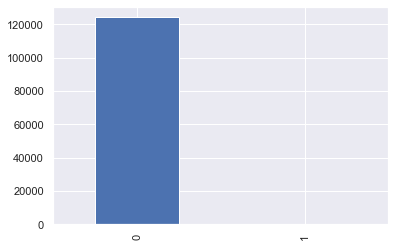

In [5]:
#check the distribution of the target variable
print("Distribution of Target:\n",df.failure.value_counts(normalize=True)*100)
df.failure.value_counts().plot.bar()

Data  is highly imbalanced with Target - 'failure' having more than 99.9% '0' (no failure) and less than 0.086% cases of '1' (failure)

### Data Manipulation

In [6]:
#Check for missing data
df.isnull().sum()

date       0
device     0
failure    0
metric1    0
metric2    0
metric3    0
metric4    0
metric5    0
metric6    0
metric7    0
metric8    0
metric9    0
dtype: int64

In [7]:
#Derived Variables

#extract first 3 letters from device
df['device_init3'] = df['device'].astype(str).str[0:3]

#extract first 4 letters from device
df['device_init4'] = df['device'].astype(str).str[0:4]

#extract first 5 letters from device
df['device_init5'] = df['device'].astype(str).str[0:5]

#Compare number of classes in each derived variable. 
print("Classes in device:", len(df.device.value_counts()))
print("Classes in device_init3:", len(df.device_init3.value_counts()))
print("Classes in device_init4:", len(df.device_init4.value_counts()))
print("Classes in device_init5:", len(df.device_init5.value_counts()))


Classes in device: 1169
Classes in device_init3: 3
Classes in device_init4: 7
Classes in device_init5: 121


Derived 3 new variables from 'device' variable to minimize number of classes and to extract new features.

In [8]:
#check datatypes of each variable
df.dtypes

date            object
device          object
failure          int64
metric1          int64
metric2          int64
metric3          int64
metric4          int64
metric5          int64
metric6          int64
metric7          int64
metric8          int64
metric9          int64
device_init3    object
device_init4    object
device_init5    object
dtype: object

In [9]:
#Change datatype of date from str to datetime
df.date=pd.to_datetime(df['date'])
df.date=pd.to_datetime(df['date'],format="%m/%d/%Y")

In [10]:
#Derive month from date variable
df['month']=pd.DatetimeIndex(df['date']).month

#Derive day of week from date variable
df['day']=pd.DatetimeIndex(df['date']).dayofweek

In [11]:
#convert datatype of target, day and month
df.failure=df.failure.astype('str')
df.month=df.month.astype('str')
df.day=df.day.astype('str')

In [12]:
#Summary of numerical variables
df.describe()

,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9
count,1.244940e+05,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000
mean,1.223881e+08,159.484762,9.940455,1.741120,14.222669,260172.657726,0.292528,0.292528,12.451524
std,7.045933e+07,2179.657730,185.747321,22.908507,15.943028,99151.078547,7.436924,7.436924,191.425623
min,0.000000e+00,0.000000,0.000000,0.000000,1.000000,8.000000,0.000000,0.000000,0.000000
25%,6.128476e+07,0.000000,0.000000,0.000000,8.000000,221452.000000,0.000000,0.000000,0.000000
50%,1.227974e+08,0.000000,0.000000,0.000000,10.000000,249799.500000,0.000000,0.000000,0.000000
75%,1.833096e+08,0.000000,0.000000,0.000000,12.000000,310266.000000,0.000000,0.000000,0.000000
max,2.441405e+08,64968.000000,24929.000000,1666.000000,98.000000,689161.000000,832.000000,832.000000,18701.000000



### Exploratory Data Analysis

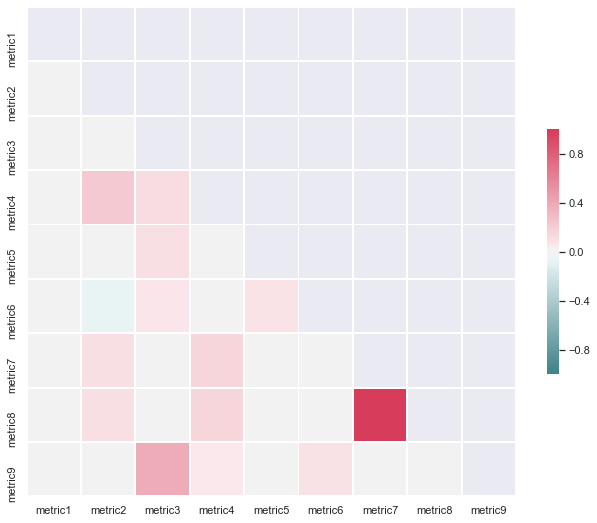

In [13]:
#plot a correlation matix
corr = df.corr('spearman')
#spearman correlation used to reduce the effect of outliers

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(200, 5, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=1, cbar_kws={"shrink": .5})

Since 'metric8' and 'metric7' are highly correlated dropping metric 8

In [14]:
df=df.drop('metric8',axis=1)

#### Box Plots
Outlier Detection

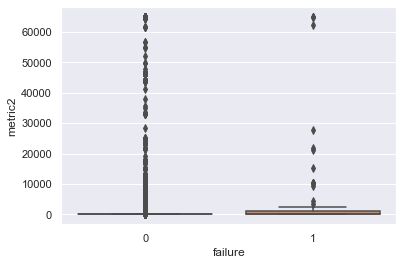

In [15]:
sns.boxplot(x="failure", y="metric2", data=df)

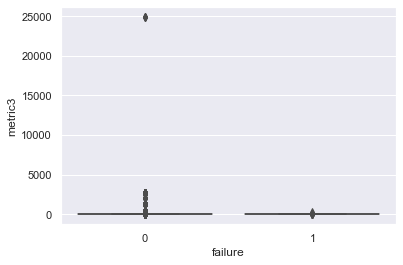

In [16]:
sns.boxplot(x="failure", y="metric3", data=df)

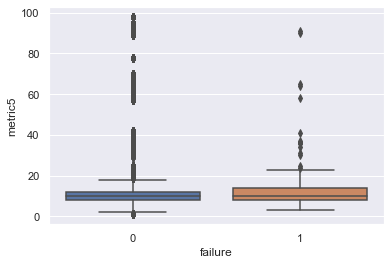

In [17]:
sns.boxplot(x="failure", y="metric5", data=df)

##### find the num of outliers in each variables

In [18]:
print('outliers in metric2:',len(df[(df['metric2']>50000) & (df['failure']=='1')]))
print('outliers in metric3:',len(df[(df['metric3']>5000) & (df['failure']=='0')]))
print('outliers in metric4:',len(df[df['metric4']>750]))
print('outliers in metric5:',len(df[(df['metric5']>50) & (df['failure']=='1')]))
a=len(df[(df['metric6']>450000) & (df['failure']=='1')])
b=len(df[(df['metric6']<100000) & (df['failure']=='1')])
print('outliers in metric6:',a+b)

outliers in metric2: 4
outliers in metric3: 4
outliers in metric4: 20
outliers in metric5: 5
outliers in metric6: 14


Create a ceiling for outliers. Only considering extreme values since more information needs to be collected about outliers. Though they are outliers according to box plots, these values might be something that occur regularly in real world scenario's.

Creating a ceiling for outliers for this data might not yield a lot of value in tree models. But doing it to just get a more clean data.

In [19]:
df['metric2']=np.where((df['metric2']>50000) & (df['failure']=='1'),50000,df['metric2'])
df['metric3']=np.where((df['metric3']>5000) & (df['failure']=='0'),5000,df['metric3'])
df['metric4']=np.where((df['metric4']>750),750,df['metric4'])
df['metric5']=np.where((df['metric5']>50) & (df['failure']=='1'),50,df['metric5'])
df['metric6']=np.where((df['metric6']>450000) & (df['failure']=='1'),450000,df['metric6'])
df['metric6']=np.where((df['metric6']<100000) & (df['failure']=='1'),100000,df['metric6'])

#### Bar plots

Study the predictor variability for 'failure' target. Higher the variance, higher could be the predictor importance of the variable. 

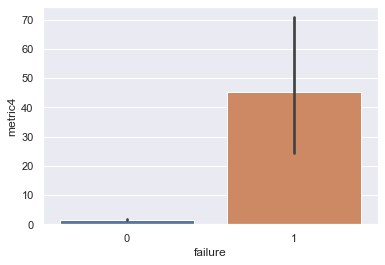

In [20]:
#plot relationship between failure and metric4
sns.categorical.barplot(x='failure',y='metric4', data=df)

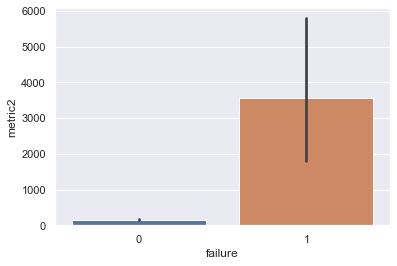

In [21]:
#plot relationship between failure and metric2
sns.categorical.barplot(x='failure',y='metric2', data=df)

#### Pairplots
Plot univariate distributions and relationship with target.

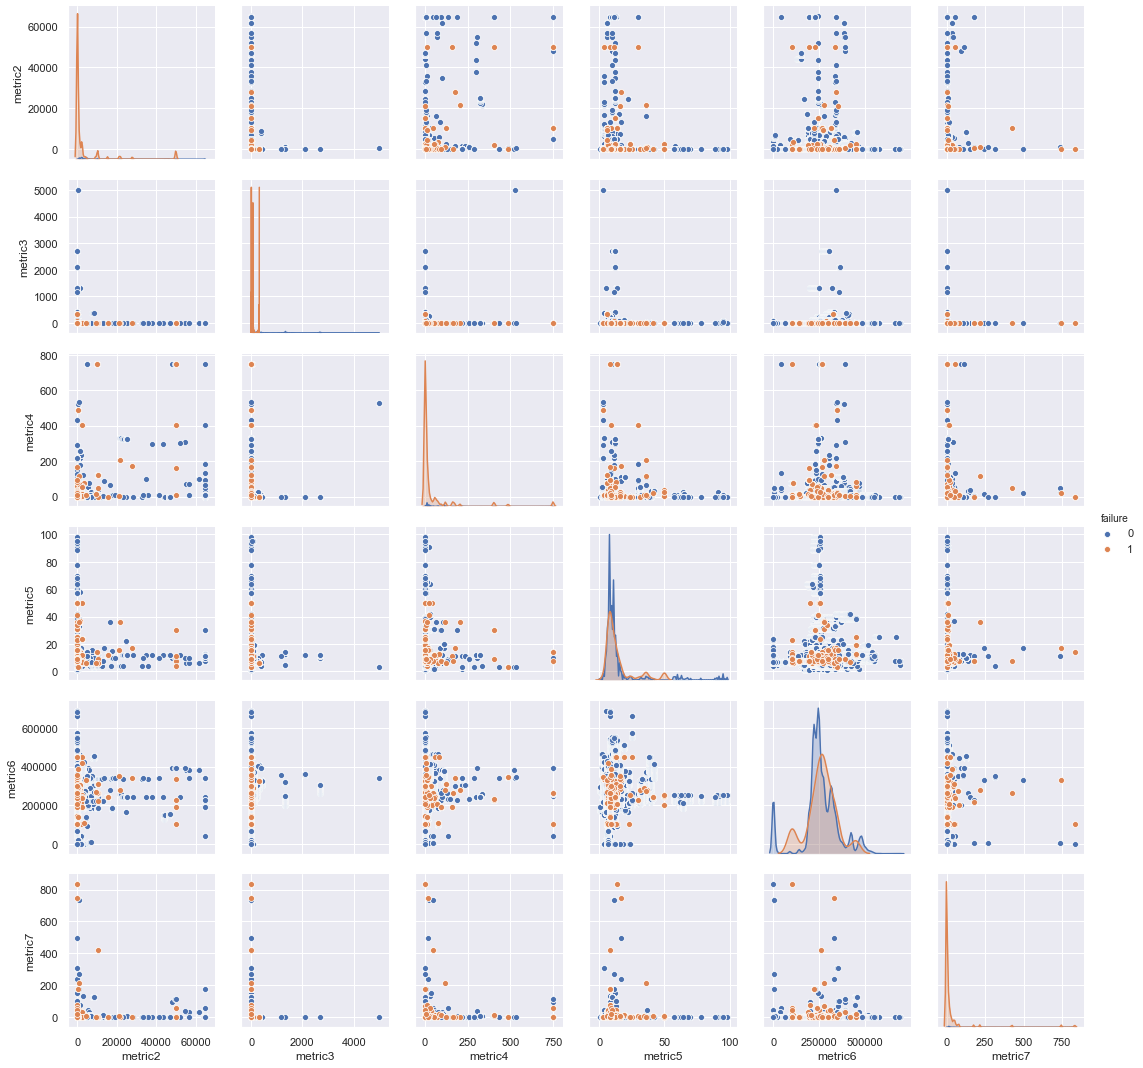

In [22]:
sns.pairplot(df, vars=["metric2", "metric3","metric4","metric5","metric6","metric7"],hue='failure',diag_kind="kde")

#### Standarizing the data
Not very helpful for tree models but performing to maybe decrease the runtime of the model

In [23]:
from sklearn.preprocessing import StandardScaler

num_cols = df.columns[df.dtypes.apply(lambda c: np.issubdtype(c, np.number))]

scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

## Modelling

### Train and Test Split

In [24]:
#Split data into train and test
from sklearn.model_selection import train_test_split

X_all=df.drop(['failure','date','device','device_init3','device_init4'], axis=1)
y_all=df['failure']

#One hot encoding
#create a seperate variable for each categorical variable class
X_all=pd.get_dummies(X_all, drop_first=True)

#Split the data into 75% train and 25% test
X_train,X_test,y_train,y_test=train_test_split(X_all, y_all, test_size=0.25,random_state=30, stratify=y_all)

### Tree Model
Creating a simple Tree model to act as a base model


In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

In [26]:
#define the model
#class_weight used to treat the imbalance of the data 

dt_cl=DecisionTreeClassifier(criterion="gini",random_state=100,max_depth=5,
                             min_samples_leaf=250,min_samples_split=500 ,class_weight='balanced')

#fit the model to training data
dt_cl.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=250, min_samples_split=500,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

In [27]:
#Predict the test and train data using the model
y_pred_train=dt_cl.predict(X_train)
y_pred_test=dt_cl.predict(X_test)

#### AUC

In [28]:
#calculate probability for each prediction
train_probs =dt_cl.predict_proba(X_train)
test_probs = dt_cl.predict_proba(X_test)
train_probs = train_probs[:, 1]
test_probs= test_probs[:, 1]

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

#calculate AUC 
auc_train = roc_auc_score(y_train,train_probs)
auc_test = roc_auc_score(y_test,test_probs)

print('AUC: %.2f' % auc_train)
print('AUC: %.2f' % auc_test)

AUC: 0.93
AUC: 0.83


In [29]:
#Calculate accuracy score
print("Accuracy of train:",accuracy_score(y_train,y_pred_train)*100)
print("Accuracy of test:",accuracy_score(y_test,y_pred_test)*100)

Accuracy of train: 93.2408696583485
Accuracy of test: 93.19496208713532


#### Plot Confusion matrix

Text(0.5, 1, 'Confusion matrix Train')

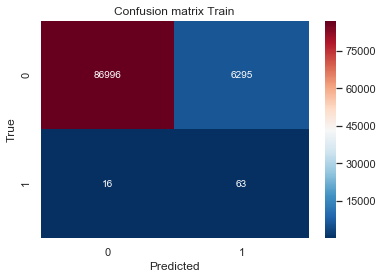

In [30]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_train,y_pred_train), annot=True, fmt="d", cmap="RdBu_r")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion matrix Train')

Text(0.5, 1, 'Confusion matrix Test')

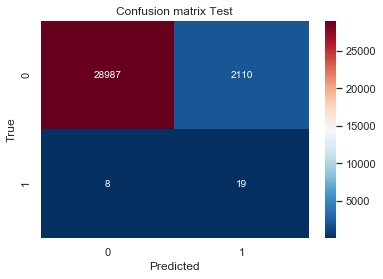

In [31]:
sns.heatmap(confusion_matrix(y_test,y_pred_test), annot=True, fmt="d", cmap="RdBu_r")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion matrix Test')

#### Feature Importance plot

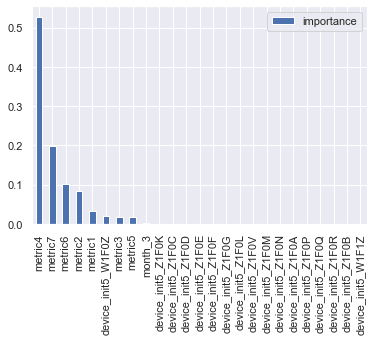

In [32]:
feature_importance=pd.DataFrame(dt_cl.feature_importances_,
                               index=X_train.columns,
                               columns=['importance']).sort_values('importance',
                                                                   ascending=False)

feature_importance.head(25).plot.bar(rot=90)

### Random Forest

In [33]:
import time

In [34]:
#import random forest module
from sklearn.ensemble import RandomForestClassifier

start_time=time.time()

#Define the model
rf_cl=RandomForestClassifier(n_jobs=-1,  class_weight='balanced', random_state=201)

from sklearn.model_selection import GridSearchCV

#choose parameters for Grid
parameters ={'n_estimators': [80,100,150],
             'max_depth':[3,4,5],
             'min_samples_leaf':[200,250,300]
             }

#Grid Search
grid_rf_cl=GridSearchCV(estimator=rf_cl,param_grid=parameters,cv=10)

#Fit the model to the training data
grid_rf_cl.fit(X_train,y_train)

print('run_time',time.time()-start_time)

run_time 20.53214144706726


In [35]:
#Predict the test and train data using the model
y_pred_train=grid_rf_cl.predict(X_train)
y_pred_test=grid_rf_cl.predict(X_test)

#### AUC

In [36]:
#calculate probability for each prediction
train_probs =grid_rf_cl.predict_proba(X_train)
test_probs = grid_rf_cl.predict_proba(X_test)
train_probs = train_probs[:, 1]
test_probs= test_probs[:, 1]

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

#calculate AUC 
auc_train = roc_auc_score(y_train,train_probs)
auc_test = roc_auc_score(y_test,test_probs)

print('AUC: %.2f' % auc_train)
print('AUC: %.2f' % auc_test)

AUC: 0.94
AUC: 0.89


#### Plot Confusion Matrix

Text(0.5, 1, 'Confusion matrix Train')

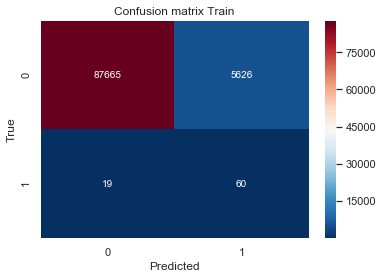

In [37]:
sns.heatmap(confusion_matrix(y_train,y_pred_train), annot=True, fmt="d", cmap="RdBu_r")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion matrix Train')

Text(0.5, 1, 'Confusion matrix Test')

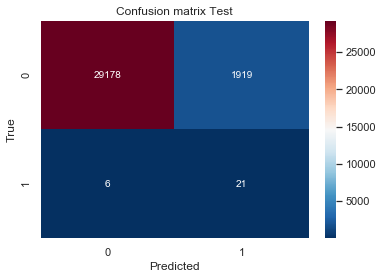

In [38]:
sns.heatmap(confusion_matrix(y_test,y_pred_test), annot=True, fmt="d", cmap="RdBu_r")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion matrix Test')

#### Plot Feature Importance

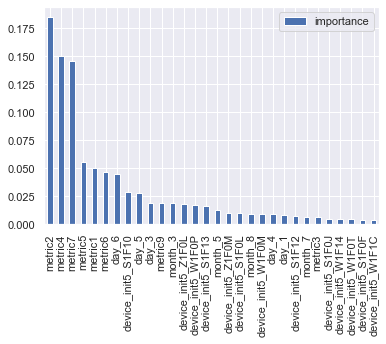

In [39]:
feature_importance=pd.DataFrame(grid_rf_cl.best_estimator_.feature_importances_,
                               index=X_train.columns,
                               columns=['importance']).sort_values('importance',
                                                                   ascending=False)

feature_importance.head(30).plot.bar(rot=90)

### XGBoost

In [40]:
#import XGBoost Classifier module
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

#Define the model
#scale_pos_weight is used to treat the imbalance in the data
#scale_pos_weight = (sum of class '0')/(sum of class '1')
xgb_cl = XGBClassifier(scale_pos_weight=1173,random_state=201)

#Define params for Grid Search
parameters = {
   "colsample_bytree": [0.7],
    "gamma": [0.1],
    "learning_rate": [0.01,0.1],
    "max_depth": [3,4,5], 
    "n_estimators":[80,100,120],
    #"alpha": [0.4,0.3,0.5]
    "subsample": [0.6,0.8]
}

#Grid Search
grid_xgb_cl=GridSearchCV(estimator=xgb_cl,param_grid=parameters, cv=10, n_jobs=-1)

#fit the model to training data
grid_xgb_cl.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=201, reg_alpha=0,
                                     reg_lambda=1, scale_pos_weight=1173,
                                     seed=None, silent=None, subsample=1,
                                     verbosity=1),
             iid='warn', n_jobs=-1,
             param_grid={'colsample_bytree': [0.7], 'gamma': [0.1],
                         'learning_rate': [0.01], 'max_dep

In [41]:
#Predict the test and train data using the model
y_pred_train=grid_xgb_cl.predict(X_train)
y_pred_test=grid_xgb_cl.predict(X_test)

#### AUC

In [42]:
#calculate probability for each prediction
train_probs =grid_xgb_cl.predict_proba(X_train)
test_probs = grid_xgb_cl.predict_proba(X_test)
train_probs = train_probs[:, 1]
test_probs= test_probs[:, 1]

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

#calculate AUC 
auc_train = roc_auc_score(y_train,train_probs)
auc_test = roc_auc_score(y_test,test_probs)

print('AUC: %.2f' % auc_train)
print('AUC: %.2f' % auc_test)

AUC: 0.96
AUC: 0.91


#### Plot Confusion Matrix

Text(0.5, 1, 'Confusion matrix Train')

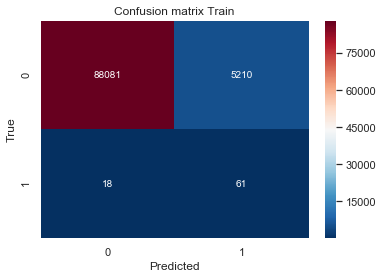

In [43]:
sns.heatmap(confusion_matrix(y_train,y_pred_train), annot=True, fmt="d", cmap="RdBu_r")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion matrix Train')

Text(0.5, 1, 'Confusion matrix Test')

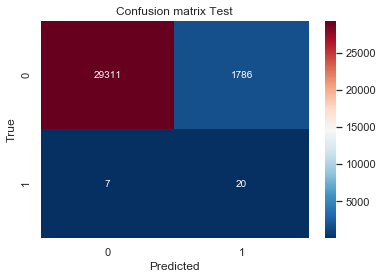

In [44]:
sns.heatmap(confusion_matrix(y_test,y_pred_test), annot=True, fmt="d", cmap="RdBu_r")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion matrix Test')

In [45]:
#Calculate accuracy score
print("Accuracy of train:",accuracy_score(y_train,y_pred_train)*100)
print("Accuracy of test:",accuracy_score(y_test,y_pred_test)*100)

Accuracy of train: 94.4007711256292
Accuracy of test: 94.23917234288652


#### Feature Importance Plot

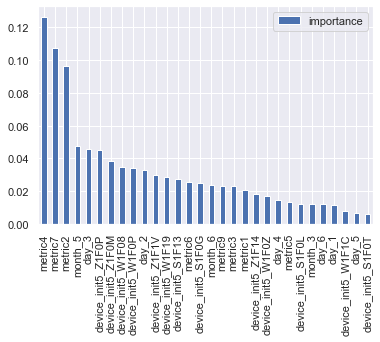

In [46]:
feature_importance=pd.DataFrame(grid_xgb_cl.best_estimator_.feature_importances_,
                               index=X_train.columns,
                               columns=['importance']).sort_values('importance',
                                                                   ascending=False)

feature_importance.head(30).plot.bar(rot=90)

### Conclusion

### Future Work

### References